In [9]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math 
from matplotlib.patches import Ellipse
#for removing warnings
import warnings

# Model data 

In [10]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
#data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path1 = 's3://velocity-u.zarr'
data_path2 = 's3://velocity-v.zarr'
data_path3 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

du = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dzz = xr.open_zarr(store=store3, consolidated=True)

In [11]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [12]:
d15 = open_s3fs('mooring_barents/A-TWAIN_2015-2017_AT200-3_22-118m_ACDP_16640.nc')
d13 = open_s3fs('mooring_barents/A-TWAIN_2013-2015_AT200-2_14-121m_ACDP_16640.nc')
d17 = open_s3fs('mooring_barents/A-TWAIN_2017-2019_AT200-4_20-167m_ACDP_16640.nc')

y1 = open_s3fs('mooring_yermark/Y1.nc')
y2 = open_s3fs('mooring_yermark/Y2.nc')
y3 = open_s3fs('mooring_yermark/Y3.nc')

MB = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MB.nc')
MW = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MW.nc')
MN = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MN.nc')
MS = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MS.nc')

ANO18 = open_s3fs('moorings_/AON_Sig_ADCP_BS3_2016_2018.nc')
ANO16 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2014_2016.nc')
ANO14 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2013_2014.nc')

In [18]:
# Barents sea
u13 = d13.UCUR.fillna(0).squeeze(axis=0)
v13 = d13.VCUR.fillna(0).squeeze(axis=0)
u15 = d15.UCUR.fillna(0).squeeze(axis=0)
v15 = d15.VCUR.fillna(0).squeeze(axis=0)
u17 = d17.UCUR.fillna(0).squeeze(axis=0)
v17 = d17.VCUR.fillna(0).squeeze(axis=0)

# Lofoten
ub = MB.u.isel(DEPTH=slice(19,-1)).fillna(0)
vb = MB.v.isel(DEPTH=slice(19,-1)).fillna(0)
uw = MW.u.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
vw = MW.v.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
un = MN.u.isel(DEPTH=slice(7,-1)).fillna(0)
vn = MN.v.isel(DEPTH=slice(7,-1)).fillna(0)
us = MS.u.isel(DEPTH=slice(8,-1)).fillna(0)
vs = MS.v.isel(DEPTH=slice(8,-1)).fillna(0)

# Yermark
u1 = y1.u.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
v1 = y1.v.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
u2 = y2.u.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
v2 = y2.v.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
u3 = y3.u.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)
v3 = y3.v.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)

# Beaufort
'sliter med å finne ut hvordan få gode oversiktlige'
u14 = ANO14.UCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
v14 = ANO14.VCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
u16 = ANO16.UCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
v16 = ANO16.VCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
u18 = ANO18.UCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
v18 = ANO18.VCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
u18 = u18.isel(BINDEPTH=slice(1,-1)).fillna(0)
v18 = v18.isel(BINDEPTH=slice(1,-1)).fillna(0)

In [13]:
p_list = [(31.13247,81.24202),
          (31.13533,81.24255),
          (31.14506,81.24587)
          ,(011.1189, 69.5289),
          (013.16845,68.58759),
          (013.19866,68.56109),
          (012.45082,68.50128),
          (5.48733,80.03876),
          (5.56333,79.44093)]
moor_l = [(836, 440),
            (838, 440),
            (836, 439),
            (915, 157),
            (930, 149),
            (932, 147),
            (929, 142),
            (774, 344+6),
            (766, 358+6),
            (773, 346+6),
            (334, 978),
            (334, 978),
            (334, 978)]
vec_l = [np.array([[ 0.27541674, -0.96132493],
        [-0.96132493, -0.27541674]]),
         np.array([[ 0.1863939, -0.9824751],
        [-0.9824751, -0.1863939]]),
         np.array([[ 0.42605245, -0.90469846],
        [-0.90469846, -0.42605245]]),
         np.array([[ 0.86834446, 0.49596158],
        [-0.49596158,  0.86834446]]),
         np.array([[-0.58294305, -0.81251301],
        [-0.81251301,  0.58294305]]),
         np.array([[ 0.86822067, -0.49617826],
        [ 0.49617826,  0.86822067]]),
         np.array([[ 0.76994574, -0.63810937],
        [ 0.63810937,  0.76994574]]),
         np.array([[ 0.62741291, -0.77868674],
        [-0.77868674, -0.62741291]]),
         np.array([[-0.60092325, -0.79930673],
        [-0.79930673,  0.60092325]]),
         np.array([[ 0.62481889, -0.78076972],
        [-0.78076972, -0.62481889]]),
         np.array([[ 0.76100801,  0.64874249],
        [-0.64874249,  0.76100801]]),
         np.array([[ 0.80047202,  0.59937012],
        [-0.59937012,  0.80047202]]),
         np.array([[ 0.89578352,  0.44449059],
        [-0.44449059,  0.89578352]])] 

c_list = ['gold', 'orangered', 'g',
          'r', 'm', 'y','tab:orange',
          'tab:pink', 'limegreen', 'maroon', 
          'dodgerblue', 'c', 'peru','deeppink']

In [14]:
moor_mod = [(836, 440),
            (838, 440),
            (836, 439),
            (915, 157),
            (930, 149),
            (932, 147),
            (929, 142),
            (774, 344),
            (766, 358),
            (773, 346),
            (334, 978)]
vec_mod = [np.array([[ 0.98798697, -0.15453721],
        [ 0.15453721,  0.98798697]]), 
         np.array([[ 0.99999737, -0.00229451],
       [ 0.00229451,  0.99999737]]), 
         np.array([[ 0.99797779,  0.06356359],
       [-0.06356359,  0.99797779]]),
         np.array([[ 0.92383114, -0.38280025],
       [ 0.38280025,  0.92383114]]), 
          np.array([[-0.43408703, -0.90087094],
       [-0.90087094,  0.43408703]]), 
         np.array([[-0.09707457, -0.99527711],
       [-0.99527711,  0.09707457]]), 
         np.array([[-0.15963378, -0.9871763 ],
       [-0.9871763 ,  0.15963378]]), 
         np.array([[ 0.81018397, -0.58617568],
       [ 0.58617568,  0.81018397]]), 
         np.array([[ 0.97174756,  0.23602264],
       [-0.23602264,  0.97174756]]), 
         np.array([[ 0.84664665, -0.53215547],
       [ 0.53215547,  0.84664665]]), 
         np.array([[-0.55791922, -0.82989526],
       [-0.82989526,  0.55791922]])]

main_mod = [0.0031375185892436137,
         0.002522691813550732, 
         0.0022871371172146705,
          
         0.07647687208041684, 
         0.08672609597829996, 
         0.07058107540719372, 
         0.04864753980612831, 
         0.0400218520307875,
         0.01527001149843686, 
         0.041980634696618606, 
         0.0663464415345908]
min_mod = [0.0011184907299555621,
         0.0010488440461297911,
         0.000943591964737983, 
         0.05576082377307558,
         0.03430598931396933,
         0.01825392254775858, 
         0.01498030195653885, 
         0.026319144262834215, 
         0.007239953032162382, 
         0.020282444514094437, 
         0.018783670816590735]
theta_mod = [8.889956888630655, 
           0.131465823410729, 
           -3.6443820733578156, 
           22.5072445139066, 
           -115.7272141805237, 
           -95.5707357979352, 
           -99.18564037010735, 
           35.88608992933248,
           -13.6519112854629, 
           32.15120723975012, 
           -123.91201995198159]

In [15]:
u = du.vozocrtx.isel(x=slice(200,1400),y=slice(650,1800))
u = u.rename({'depthu' : 'depth'})
v = dv.vomecrty.isel(x=slice(200,1400),y=slice(650,1800))
v = v.rename({'depthv' : 'depth'})

bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

In [17]:
def PC(data):
    cov = np.cov(data.T, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors

In [6]:
def PCz(x,y):
    'Finding the level the given location dosent have values for anymore'

    d = bathym.isel(x=x, y=y).values

    dypu = u.isel(x=x, y=y, depth = slice(0,d-1)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
    dypv = v.isel(x=x, y=y, depth = slice(0,d-1))
    
    valu, vecu = PC(dypu)
    valv, vecv = PC(dypv)
    
    PC1u = (np.sqrt(valu[0])*vecu[:,0])
    PC1v = (np.sqrt(valv[0])*vecv[:,0])
    
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    
    return PC1u, PC1v, dypu, dypv, PVE1u, PVE1v

'Making a function for the vertical PC'
def PCz_op(x,y, vec):
    
    d = bathym.isel(y=y, x=x).values
    up = u.isel(y=y, x=x, depth=d)
    vp = v.isel(y=y, x=x, depth=d)
    
    vel_p = (up*vec[0] + vp*vec[1])/(np.sqrt(vec[0]**2 + vec[1]**2))
    vel_o = (-up*vec[1] + vp*vec[0])/(np.sqrt(vec[0]**2 + vec[1]**2))
    
    valp, vecp = PC(vel_p)
    valo, veco = PC(vel_o)
    
    PC1p = (np.sqrt(valp[0])*vecp[:,0])
    PC1o = (np.sqrt(valo[0])*veco[:,0])
    
    PVE1p = int(round(valp[0]/np.sum(valp)*100,0))
    PVE1o = int(round(valo[0]/np.sum(valo)*100,0))
    
    return PC1p, PC1o, dyp_p, dyp_o, PVE1p, PVE1o

def ellipse(x,y,d):
    
    #d = bathym.isel(y=y, x=x).values
    covm = np.cov(np.vstack([u.isel(x=x, y=y, depth=d).values,v.isel(x=x, y=y, depth=d).values]))
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    
    # ellipser :
    major = np.sqrt(values[0])
    minor = np.sqrt(np.abs(values[1]))
    
    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    #theta = np.arctan(vy/vx)#*(180/math.pi)
    theta = np.arctan2(vy, vx)*(180/math.pi)
    
    return major, minor, theta, vectors


In [ ]:
def ellipser_nDEPTH(u,v,depth):
    
    covm = np.cov(np.vstack([u.isel(nDEPTH=depth).values,v.isel(nDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])
    minor = np.sqrt(np.abs(values[1]))

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
    return major, minor, theta, vectors

def ellipser_DEPTH(u,v,depth):
    
    s = 1e2
        
    covm = np.cov(np.vstack([u.isel(DEPTH=depth).values,v.isel(DEPTH=depth).values]))
    
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    #theta = np.arctan(vy/vx)#*(180/math.pi)
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta, vectors

def ellipser_BINDEPTH(u,v,depth):
    
    s=100
    
    covm = np.cov(np.vstack([u.isel(BINDEPTH=depth).values,v.isel(BINDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta, vectors

def PCz_moor_op(up,vp,vec):
        
    p = up*vec[0] +  vp*vec[1]
    o = -up*vec[1] +  vp*vec[0]

    val_p, vec_p = PCz(p) 
    val_o, vec_o = PCz(o) 
    
    EOFp = (np.sqrt(val_p[0])*vec_p[:,0])
    EOFo = (np.sqrt(val_o[0])*vec_o[:,0])
    
    PVEp = int(round(val_p[0]/np.sum(val_p)*100,0))
    PVEo = int(round(val_o[0]/np.sum(val_o)*100,0))
    
    return EOFp, EOFo, PVEp, PVEo

# starting with horizontal variance ellipses 

In [7]:
d_l = [40,35,35,18]
moor_l = [(923, 157),
            (932, 147),
            (929, 142),
            (334, 978)]
maj_l = []
min_l = []
theta_l = []
vec_l = []

for i, m in enumerate(moor_l):
    print(i)
    x = m[0]
    y = m[1]
    d_ = d_l[i]
    maj_, min_, theta_, vec_ = ellipse(x,y,d_)
    maj_l.append(maj_)
    min_l.append(min_)
    theta_l.append(theta_)
    vec_l.append(vec_)

0
1
2
3


In [8]:
print(vec_l)
print('-----------------')
print(maj_l)
print('-----------------')
print(min_l)
print('-----------------')
print(theta_l)
print('-----------------')

[array([[ 0.92383114, -0.38280025],
       [ 0.38280025,  0.92383114]]), array([[-0.09707457, -0.99527711],
       [-0.99527711,  0.09707457]]), array([[-0.15963378, -0.9871763 ],
       [-0.9871763 ,  0.15963378]]), array([[-0.55791922, -0.82989526],
       [-0.82989526,  0.55791922]])]
-----------------
[0.07647687208041684, 0.07058107540719372, 0.04864753980612831, 0.0663464415345908]
-----------------
[0.05576082377307558, 0.01825392254775858, 0.01498030195653885, 0.018783670816590735]
-----------------
[22.5072445139066, -95.5707357979352, -99.18564037010735, -123.91201995198159]
-----------------


In [ ]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at 86 meters depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for m in moor_l[0:2]:
    x = m[0]
    y = m[1]
    depth = 22
    
    maj_, min_, theta_, vec = ellipse(x,y,depth)
    PVE = round((maj_**2/(maj_**2+ min_**2))*100,0) 
    velocity = round((maj_/(maj_+ min_)),2) 
    print(velocity)
    s = 0.5e5
    ellipse_ = Ellipse((y,x), 
            width = maj_*2*s, 
            height = min_*2*s,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label= f'PEV {PVE}%'
                     )
    vec_l.append(vec)
    ax.add_patch(ellipse_)
    
for m in moor_l[3:10]:
    x = m[0]
    y = m[1]
    depth = 40
    
    maj_, min_, theta_, vec = ellipse(x,y,depth)
    PVE = round((maj_**2/(maj_**2+ min_**2))*100,0) 
    velocity = round((maj_/(maj_+ min_)),2) 
    print(velocity)
    s = 0.5e5
    ellipse_ = Ellipse((y,x), 
            width = maj_*2*s, 
            height = min_*2*s,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label= f'PEV {PVE}%'
                     )
    vec_l.append(vec)
    ax.add_patch(ellipse_)
    
for m in moor_l[10:]:
    x = m[0]
    y = m[1]
    depth = 20
    
    maj_, min_, theta_, vec = ellipse(x,y,depth)
    PVE = round((maj_**2/(maj_**2+ min_**2))*100,0) 
    velocity = round((maj_/(maj_+ min_)),2) 
    print(velocity)
    s = 0.5e5
    ellipse_ = Ellipse((y,x), 
            width = maj_*2*s, 
            height = min_*2*s,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label= f'PEV {PVE}%'
                     )
    vec_l.append(vec)
    ax.add_patch(ellipse_)

ax.legend(frameon=False, fontsize=12, loc="upper left") 
    
#ax.set_xlim(750,950)
#ax.set_ylim(300,500)
ax.grid('on')
ax.set_aspect('equal')
plt.savefig('mood_ellipse_moor_loc.pdf', dpi = 300)

KeyboardInterrupt: 

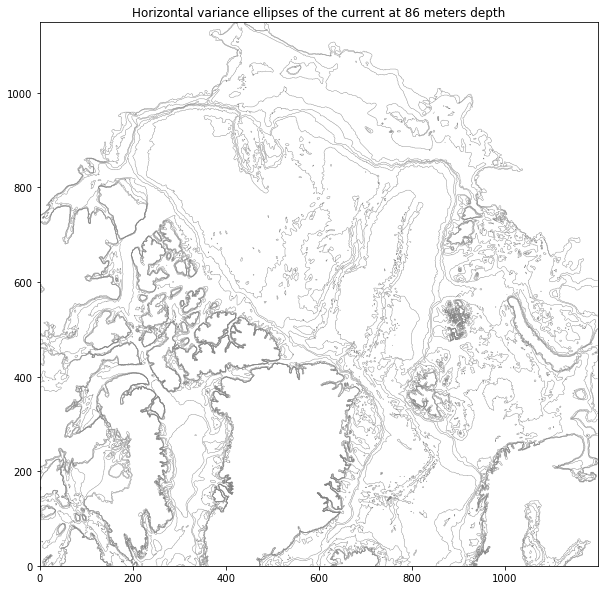

In [7]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at 86 meters depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for m in moor_l[0:2]:
    y = m[0]
    x = m[1]
    depth = 22
    
    maj_, min_, theta_, vec = ellipse(x,y,depth)
    PVE = round((maj_**2/(maj_**2+ min_**2))*100,0) 
    velocity = round((maj_/(maj_+ min_)),2) 
    print(velocity)
    s = 0.5e5 #stands for scale
    
    ellipse_ = Ellipse((y,x), 
            width = maj_*2*s, 
            height = min_*2*s,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label= f'PEV {PVE}%'
                     )
    vec_l.append(vec)
    ax.add_patch(ellipse_)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
ax.set_xlim(750,950)
ax.set_ylim(300,500)
ax.set_aspect('equal')
#plt.savefig('mood_ellipse_moor_loc.pdf', dpi = 300)  

In [28]:
u

<xarray.DataArray 'vozocrtx' (time_counter: 73, depth: 75, y: 1150, x: 1200)>
dask.array<getitem, shape=(73, 75, 1150, 1200), dtype=float32, chunksize=(1, 75, 1150, 1200), chunktype=numpy.ndarray>
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat        (y, x) float32 dask.array<chunksize=(1150, 1200), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(1150, 1200), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter   (time_counter) object 2000-01-03 12:00:00 ... 2000-12-29 1...
Dimensions without coordinates: y, x
Attributes:
    cell_methods:        time: mean (interval: 360 s)
    interval_operation:  360 s
    interval_write:      5 d
    long_name:           sea_water_x_velocity
    online_operation:    average
    standard_name:       sea_water_x_velocity
    units:               m/s

In [24]:
#vec_l = []

In [34]:
m = moor_l[0]
y = m[0]
x = m[1]
d_ = bathym.isel(x=x,y=y).values
print(d_)
u_ = u.isel(x=x,y=y,depth=d_) #.values
v_ = v.isel(x=x,y=y,depth=d_) #.values
#print(u_,v_)

65


# EOF Vertical and EOF rotated with major and minor axis from horizontal ellipses

In [ ]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,3,figsize = (20,11))
plt.suptitle('EOF1 from model data, Barents Sea', 
             horizontalalignment='center',
            fontsize=24)

axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axes.flat, [0,2,3]):
    pp = moor_l[i]
    print(pp[0], pp[1])    
    PC1u, PC1v, dypu, dypv, PVE1u, PVE1v = PCz(pp[0],pp[1])
        
    axs.plot(PC1u,dypu.depth, 'darkgreen', label = f'EOF1-u, PVE={PVE1u}%')
    axs.plot(PC1v,dypv.depth, 'mediumseagreen', label= f'EOF1-v, PVE={PVE1v}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=12, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
fig.tight_layout()   

plt.savefig('EOF_Barents_mod.pdf', dpi = 300)

In [ ]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,3,figsize = (20,11))
plt.suptitle('EOF1 from model data rotated after variance ellipses, Barents sea', 
             horizontalalignment='center',
            fontsize=24)
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axes.flat, [0,1,2]):
    pp = moor_l[i]
    vec = vec_l[i][:,0]
    print(pp[0], pp[1])    
    PC1u, PC1v, dypu, dypv, PVE1u, PVE1v = PCz_op(pp[0],pp[1],vec)
        
    axs.plot(PC1u,dypu.depth, 'darkgreen', label = f'EOF1-u, PVE={PVE1u}%')
    axs.plot(PC1v,dypv.depth, 'mediumseagreen', label= f'EOF1-v, PVE={PVE1v}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    
plt.savefig('EOFrot_Barents_mod.pdf', dpi = 300)

In [ ]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,4,figsize = (20,11))
plt.suptitle('EOF1 from model data, Lofoten Basin', 
             horizontalalignment='center',
            fontsize=24)
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axes.flat, [3,4,5,6]):
    pp = moor_l[i]
    print(pp[0], pp[1])    
    PC1u, PC1v, dypu, dypv, PVE1u, PVE1v = PCz(pp[0],pp[1])
        
    axs.plot(PC1u,dypu.depth, 'darkgreen', label = f'EOF1-u, PVE={PVE1u}%')
    axs.plot(PC1v,dypv.depth, 'mediumseagreen', label= f'EOF1-v, PVE={PVE1v}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    
plt.savefig('EOF_Lofoten_mod.pdf', dpi = 300)

In [ ]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,4,figsize = (20,11))
plt.suptitle('EOF1 from model data rotated after variance ellipses, Lofoten Basin', 
             horizontalalignment='center',
            fontsize=24)
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axes.flat, [3,4,5,6]):
    pp = moor_l[i]
    vec = vec_l[i][:,0]
    print(pp[0], pp[1])    
    PC1u, PC1v, dypu, dypv, PVE1u, PVE1v = PCz_op(pp[0],pp[1],vec)
        
    axs.plot(PC1u,dypu.depth, 'darkgreen', label = f'EOF1-u, PVE={PVE1u}%')
    axs.plot(PC1v,dypv.depth, 'mediumseagreen', label= f'EOF1-v, PVE={PVE1v}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    
plt.savefig('EOFrot_Lofoten_mod.pdf', dpi = 300)

In [ ]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,4,figsize = (20,11))
plt.suptitle('EOF1 from model data, Yermark Plateau', 
             horizontalalignment='center',
            fontsize=24)
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axes.flat, [7,8,9]):
    pp = moor_l[i]
    print(pp[0], pp[1])    
    PC1u, PC1v, dypu, dypv, PVE1u, PVE1v = PCz(pp[0],pp[1])
        
    axs.plot(PC1u,dypu.depth, 'darkgreen', label = f'EOF1-u, PVE={PVE1u}%')
    axs.plot(PC1v,dypv.depth, 'mediumseagreen', label= f'EOF1-v, PVE={PVE1v}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    
plt.savefig('EOF_Yermark_mod.pdf', dpi = 300)

In [ ]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,3,figsize = (20,11))
plt.suptitle('EOF1 from model data rotated after variance ellipses, Yermark Plateau', 
             horizontalalignment='center',
            fontsize=24)
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axes.flat, [7,8,9]):
    pp = moor_l[i]
    vec = vec_l[i][:,0]
    print(pp[0], pp[1])    
    PC1u, PC1v, dypu, dypv, PVE1u, PVE1v = PCz_op(pp[0],pp[1],vec)
        
    axs.plot(PC1u,dypu.depth, 'darkgreen', label = f'EOF1-u, PVE={PVE1u}%')
    axs.plot(PC1v,dypv.depth, 'mediumseagreen', label= f'EOF1-v, PVE={PVE1v}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    
plt.savefig('EOFrot_Yermark_mod.pdf', dpi = 300)

In [ ]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,4,figsize = (20,11))
plt.suptitle('EOF1 from model data, Beaufort Shelf', 
             horizontalalignment='center',
            fontsize=24)
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axes.flat, [10,11,12]):
    pp = moor_l[i]
    print(pp[0], pp[1])    
    PC1u, PC1v, dypu, dypv, PVE1u, PVE1v = PCz(pp[0],pp[1])
        
    axs.plot(PC1u,dypu.depth, 'darkgreen', label = f'EOF1-u, PVE={PVE1u}%')
    axs.plot(PC1v,dypv.depth, 'mediumseagreen', label= f'EOF1-v, PVE={PVE1v}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    
plt.savefig('EOF_Beaufort_mod.pdf', dpi = 300)

In [ ]:
warnings.simplefilter("ignore")
fig, axes = plt.subplots(1,3,figsize = (20,11))
plt.suptitle('EOF1 from model data rotated after variance ellipses, Beaufort Shelf', 
             horizontalalignment='center',
            fontsize=24)
axes[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axes.flat, [10,11,12]):
    pp = moor_l[i]
    vec = vec_l[i][:,0]
    print(pp[0], pp[1])    
    PC1u, PC1v, dypu, dypv, PVE1u, PVE1v = PCz_op(pp[0],pp[1],vec)
        
    axs.plot(PC1u,dypu.depth, 'darkgreen', label = f'EOF1-u, PVE={PVE1u}%')
    axs.plot(PC1v,dypv.depth, 'mediumseagreen', label= f'EOF1-v, PVE={PVE1v}%')
    axs.axvline(0, color='k', linestyle = '--')
    axs.legend(frameon=False, fontsize=10, loc="upper left") 
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    
plt.savefig('EOFrot_Beaufort_mod.pdf', dpi = 300)